# 独热编码(One-Hot Encoding)

**独热编码（One-Hot Encoding）**是处理无序类别特征最常用的方法之一，它将每个类别值转换为一个新的二进制特征列（0或1），适用于大多数机器学习算法（如线性回归、逻辑回归、SVM、树模型等）。

## 基本思想

将包含$K$个类别的特征转换为$K$个二进制特征列，每列表示一个类别的存在与否。

若原始特征$X$有取值$\{v_1, v_2, ..., v_K\}$，则编码后生成$K$个新特征：

$$X_{v_i} = \begin{cases} 
1 & \text{如果 } X = v_i \\
0 & \text{否则}
\end{cases}$$

## 示例

独热编码是一种将类别型特征转换为稀疏向量的编码方式。对于一个类别特征的每个取值，创建一个新列，类别对应的位置为 1，其它为 0。

### 原始特征

| Color |
| ----- |
| Red   |
| Green |
| Blue  |


### 独热编码结果

| Color\_Red | Color\_Green | Color\_Blue |
| ---------- | ------------ | ----------- |
| 1          | 0            | 0           |
| 0          | 1            | 0           |
| 0          | 0            | 1           |


## 优缺点

- 优点：
    - 简单直观，易于实现，使用 pandas 或 sklearn 可快速完成编码。
    - 与多数模型兼容性好，特别适合线性模型（如逻辑回归）和树模型（如随机森林、XGBoost）。
    -  每个类别明确分列，更容易做特征分析和可视化。
- 缺点：
    - 维度灾难（高维稀疏）：类别数较大时，特征数量激增，计算效率低下。
    - 对相似类别无表达能力：不能反映类别之间的相似性或语义关系（如 “cat”和“dog”被完全不同编码）。
    - 模型容易过拟合：独热编码之后的高维稀疏空间容易导致模型过拟合。

## 适用场景

- **类别数量较少的无序特征**：如性别、是否购买、用户类型等。         
- **决策树类模型（Random Forest、XGBoost）**：能有效利用 one-hot 特征分裂特征空间。
- **需要模型可解释性**：特征可视化清晰，方便理解每一列的含义。
- **线性模型（如逻辑回归）**：需要数值型输入且不能容忍类别间顺序假设。
- **对数据量要求不高的场景**：特征维度可控，避免维度灾难。

# 代码实现

python中的独热编码实现主要有**pd.get_dummies()**、**OneHotEncoder**

## pd.get_dummies()

- `data`：独热编码对象数据
- `prefix`：新列的前缀。如设置为 Color，则结果列为 Color_Red、Color_Blue 等。
- `prefix_sep`：前缀和类值之间的分隔符，默认是 _，可设为 '' 去掉分隔符。
- `dummy_na`：是否将缺失值也作为一种类别进行编码（生成一个额外列）。
- `columns`：指定要编码的列。
- `sparse`：是否返回稀疏矩阵 DataFrame。
    - True（默认）：返回稀疏矩阵（scipy.sparse.csr_matrix）
    - False：返回普通 NumPy 数组（便于可视化/调试）
- `dtype`：指定返回列的数据类型，如 np.uint8 可节省内存。

In [10]:
import pandas as pd
df = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red']})
df

,Color
0,Red
1,Green
2,Blue
3,Red


In [11]:
df_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color', prefix_sep='_',sparse=True)
df_encoded

,Color_Blue,Color_Green,Color_Red
0,False,False,True
1,False,True,False
2,True,False,False
3,False,False,True


## OneHotEncoder

### 输入参数

- `sparse_output`：是否返回稀疏矩阵 DataFrame。
    - True（默认）：返回稀疏矩阵（scipy.sparse.csr_matrix）
    - False：返回普通 NumPy 数组（便于可视化/调试）
- `dtype`：指定返回列的数据类型。
- `handle_unknown`：测试集中出现新类别时的处理方式。
    - `error`：抛出错误（默认）
    - `ignore`：忽略该值，全部置零（即该类不会被编码成1）
- `min_frequency`：仅编码频率超过阈值的类别，其余类别合并为 'infrequent'。如设为 min_frequency=0.05，只编码出现频率超过 5% 的类别
- `max_categories`：仅保留最多前N个高频类别，其余类别合并为 'infrequent'。如设为 max_categories=10，只保留前 10 个类别
    - `max_categories` 与 `min_frequency` 互斥，不能同时设定。

### 方法

| 方法名                                          | 说明                |
| -------------------------------------------- | ----------------- |
| `fit(X)`                                     | 拟合训练数据    |
| `transform(X)`                               | 将数据编码成 one-hot 格式 |
| `fit_transform(X)`                           | 拟合 + 转换，组合操作      |
| `inverse_transform(X_encoded)`               | 将编码后的数据还原为原始类别    |
| `get_feature_names_out()` | 获取编码后的列名          |
| `get_params()`                               | 获取模型参数（字典）        |
| `set_params(**params)`                       | 设置参数              |
|  `categories_`       | 获取每列的类别列表（拟合后可用）  |


### 案例

In [12]:
from sklearn.preprocessing import OneHotEncoder
# 创建编码器对象
encoder = OneHotEncoder(sparse_output=False)
# 拟合转换
encoded = encoder.fit_transform(df[['Color']])
# 转换为 DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Color']))
encoded_df

,Color_Blue,Color_Green,Color_Red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0


In [13]:
# 将编码后的数据还原为原始类别
encoder.inverse_transform(encoded)

array([['Red'],
       ['Green'],
       ['Blue'],
       ['Red']], dtype=object)

In [14]:
# 获取编码后的列名
encoder.get_feature_names_out()

array(['Color_Blue', 'Color_Green', 'Color_Red'], dtype=object)

In [15]:
# 获取模型参数（字典）
encoder.get_params()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'feature_name_combiner': 'concat',
 'handle_unknown': 'error',
 'max_categories': None,
 'min_frequency': None,
 'sparse_output': False}

In [16]:
# 获取每列的类别列表（拟合后可用）
encoder.categories_

[array(['Blue', 'Green', 'Red'], dtype=object)]

# 实际案例

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [17]:
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

lightgbm版本必须是4.6.0，否则可能报错

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.893203	train's binary_logloss: 0.560678	valid's auc: 0.890862	valid's binary_logloss: 0.576411
[20]	train's auc: 0.897132	train's binary_logloss: 0.499408	valid's auc: 0.893758	valid's binary_logloss: 0.51572
[30]	train's auc: 0.899825	train's binary_logloss: 0.458364	valid's auc: 0.895817	valid's binary_logloss: 0.479042
[40]	train's auc: 0.903233	train's binary_logloss: 0.430082	valid's auc: 0.900257	valid's binary_logloss: 0.455879
[50]	train's auc: 0.90533	train's binary_logloss: 0.408861	valid's auc: 0.901931	valid's binary_logloss: 0.439885
[60]	train's auc: 0.909259	train's binary_logloss: 0.391636	valid's auc: 0.901737	valid's binary_logloss: 0.426792
[70]	train's auc: 0.913751	train's binary_logloss: 0.37833	valid's auc: 0.900708	valid's binary_logloss: 0.41844
[80]	train's auc: 0.919528	train's binary_logloss: 0.364815	valid's auc: 0.902638	valid's binary_logloss: 0.41148
[90]	train's auc: 0.9236

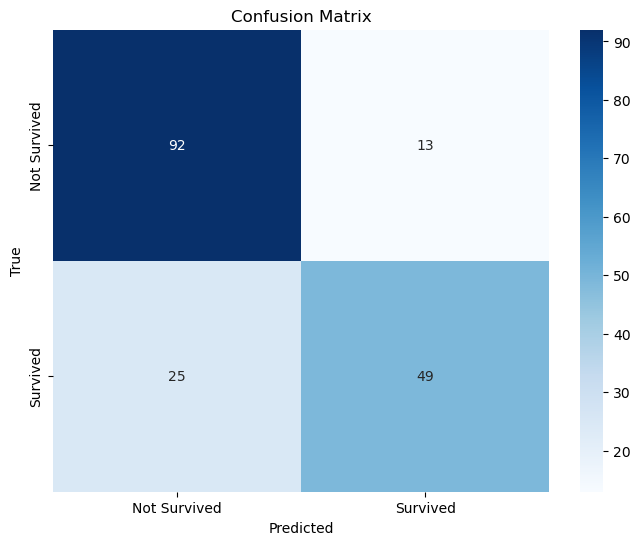

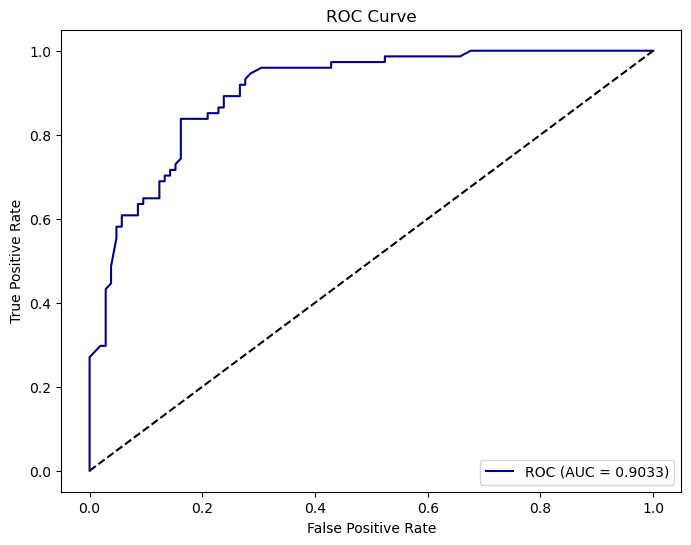

In [18]:
# ============ 1. 导入库 ============
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# 选择用于建模的特征和目标
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

# 删除含缺失值的行（也可使用填补方法）
df = df[features + [target]].dropna()

# 拆分特征和标签
X = df[features]
y = df[target]

# ============ 3. 划分训练集和验证集 ============
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============ 4. 类别变量：手动独热编码 ============
cat_cols = ['sex', 'embarked']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train_raw[cat_cols])

X_train_cat = ohe.transform(X_train_raw[cat_cols])
X_test_cat = ohe.transform(X_test_raw[cat_cols])

# ============ 5. 数值变量：直接使用 ============
num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
X_train_num = X_train_raw[num_cols].to_numpy()
X_test_num = X_test_raw[num_cols].to_numpy()

# ============ 6. 合并数值 + 编码后的类别变量 ============
X_train = np.hstack([X_train_cat, X_train_num])
X_test = np.hstack([X_test_cat, X_test_num])

# 获取最终的特征名
feature_names = list(ohe.get_feature_names_out(cat_cols)) + num_cols

# ============ 7. 创建 LightGBM 数据集 ============
dtrain = lgb.Dataset(X_train, label=y_train, feature_name=feature_names)
dtest = lgb.Dataset(X_test, label=y_test, reference=dtrain)

# ============ 8. 设置 LightGBM 参数 ============
params = {
    # 任务类型和评估指标
    'objective': 'binary',               # 二分类任务
    'metric': {'binary_logloss', 'auc'}, # 同时监控对数损失和AUC
    
    # 树结构控制
    'num_leaves': 60,       # 叶子节点数（控制模型复杂度）
    'max_depth': -1,        # -1表示不限制深度（通常用num_leaves控制）
    'min_data_in_leaf': 30, # 叶子节点最小样本数（防过拟合）
    
    # 训练过程控制
    'learning_rate': 0.03,  # 学习率（步长）
    'feature_fraction': 0.9, # 每轮随机选择90%特征
    'bagging_fraction': 0.8, # 每轮随机选择80%数据
    
    # 正则化
    'lambda_l1': 0.1,       # L1正则化系数
    'lambda_l2': 0.001,     # L2正则化系数
    
    # 其他
    'verbosity': -1,        # 静默模式（不输出训练日志）
    'seed': 2019    # 随机种子
}

# ============ 9. 训练模型 ============
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=1000,
    valid_sets=[dtrain, dtest],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(10)
    ]
)

# ============ 10. 模型预测 ============
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# ============ 11. 模型评估 ============
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ============ 12. 可视化结果 ============

# (1) 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Survived", "Survived"],
    yticklabels=["Not Survived", "Survived"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# (2) ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', label=f'ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()